In [0]:
# 텐서플로 튜토리얼 해보자

# tensorflow 와 tk.keras 를 임포트 합니다.
import tensorflow as tf
from tensorflow import keras
# 핼퍼(helper) 라이브러리 임포트합니다.
# 시각화 작업이나 분석하기위한 숫자 라이브러리를 핼퍼라고 함
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 훈련 데이터셋 MNIST 로 이미지 분석을 해 보자.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 그냥 데이터셋을 사용할 수 있는 이유는 fashion 데이터셋이 파이썬으로 이루어졌기 때문에
# 아닌경우는 수동으로 쪼개줘야 한다.
# datasets 에는 80개정도의 데이터셋이 있는데
# 이안에는 훈련용 테스트, 라벨, 테스트용 이미지, 라벨 네가지로 분류시켜져있음
# 총 4개의 numpy 배열로 반환. 
# 그림 하나한 28/28 해상도의 픽셀로 구성
# 이미지는 하나의 픽셀이 갖는 픽셀값은 0과 255 사이.
# labels 쪽은 0에서 9까지의 정수 배열로 구성되어 있다. 이 값은 이미지에 있는 옷의 클래스(calss)를 나타낸다.
# 대신 각각의 라벨에 대해 어떤 클래스이름인지 데이터셋에 안 들어있기 때문에 별도의 배열 형태로 만들어 놔야 한다.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
# tensorflow  2.X  버전에 내부 tk.keras 를 사용하고있는중


In [0]:
# 데이터 탐색
# 모델을 훈련하기 전에 데이터 셋 구조를 살펴보자
# 훈련데이터셋은 60,000, 테스트 데이터셧은 10000 개로 되어있다.
train_images.shape  # 차원에 대한 데이터 갯수를 보여준다.
# 총 60000 개, 하나당 28*28 로 구성된 넘파이 배열

(60000, 28, 28)

In [0]:
len(train_labels) # 당연히 값에 대한 답(레이블) 도 60000개

60000

In [0]:
train_labels
# array([9, 0, 0, ..., 3, 0, 5], dtype=uint8) array배열이고 unit8 양의 정수 8비트 값이다. 라는 뜻.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
print(test_images.shape)
print(len(test_labels))
test_labels
# 이처럼 확인하는 이유는 항상 검사해야 하고
# 완전 무결한 데이터셋은 없다. 반드시 검사를 해봐야 한다.

(10000, 28, 28)
10000


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

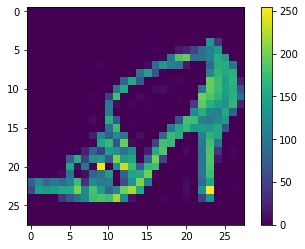

In [0]:
plt.figure()  #새로운 창 생성
plt.imshow(train_images[8000])  #차트에다 이미지 보여주기 배열에서 인덱스 사용해서  꺼내옥다.
plt.colorbar()  #이미지 우측에 색 농도 바 만들어주기
plt.grid(False) #차트 그리그 만들어 주지 마라
plt.show() # 최종적으로 차트 만들어 달라

In [0]:
# 각 픽섹의 값이 농도 형식으로 들어가있어서 이걸 다시 컴퓨터가 알수 있는 값으로 변경
# 0~1 사이의 값으로 조정 이를 위해 255 로 나눠준다.
# 훈련세트와 테스트 세트를 동일한 방식으로 전처리 하는 것이 중요
train_images = train_images / 255.0
test_images = test_images / 255.0 

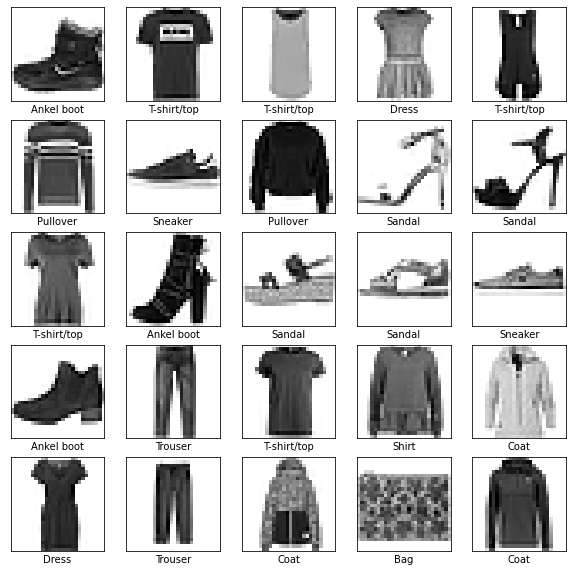

In [0]:
# 훈련 데이터 셋에서 25개만 이미지와 라벨 시각화 해서 보겠다.
# 이때 사용하는것이 subplot
plt.figure(figsize =(10,10))  # 가로 세로 비율값을 10대 10으로
for i in range(25):     # 25개니까 for문을 25번 돌려야하나까. 0~24까지 정수형태.
  plt.subplot(5,5, i+1)  # 서브플롯 5행 5열, 하나의 플롯은 1번위치부터.
  plt.xticks([])        # 틱 없이
  plt.yticks([])        # 틱 없이
  plt.grid(False)       # grid  안만든다.
  plt.imshow(train_images[i], cmap = plt.cm.binary)  # i번쨰 이미지, cmap는 컬러명
  plt.xlabel(class_names[train_labels[i]])    # x축에 라벨 붙여 주는데 i번째 라벨.
plt.show()

In [0]:
#### 레이어(층) 만들어주기
# 모델 구성
# 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일 합니다.
# 층 설정 # 단일 레이어와 다중레이어 가능
# 신경망의 기본 구성 요소는 층(layer)입니다.
# 층은 주입된 데이터에서 표현을 추출 # 데이터를 imput 받아서 레이어에 연산을 거친다음 결과를 내보냄
# 아마도 문제를 해결하는데 더 의미있는 표현이 추출될것입니다.
# 대부분의 딥러닝은 간단한 층을 순차적으로 쌓아서 구성
# tf.keras.layers.Dense 와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습이 자동으로 이루어진다.
model = keras.Sequential([  # 레이어 층을 만들기 위한 시퀀셜 제작
                          keras.layers.Flatten(input_shape = (28,28)),  #하나의 이미지가 28*28로 된 배열로 어있는데 flat 은 이것을 1열로 쭉 나열시켜줌
                          keras.layers.Dense(128, activation='relu'),   #Danse 128,10 은 모드들에 대한 밀집값
                          keras.layers.Dense(10, activation='softmax')
])

#tf.keras.layer.Flatten 은 2차원 배열의 이미지 포멧을 28*28 = 784 픽셀의 1차원 배열로 나타냄
# 이 층은 이미지에 있는 픽셀의 행을 펼처서 일렬로 늘립니다.
# 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다. 학습에 영향은 없다. 단지 변환만.

#tk.keras.layers.Danse 밀집연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 한다.
# 첫번째 Dasne층은 128 개의 노드(또는 뉴런)을 가집니다. (128,10 은 연산자의 갯수)
# 두 번째 층은 10 개의 노드의 소프트맥스(softmax) 층입니다.
# 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1 입니다. # 라벨값이 10개니까 10으로 설정
# 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.
# relu, softmax 는 내장 알고리즘.

In [0]:
# 모델 컴파일
# 모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됨
# 아래는 기본적인 설정 옵션들 전체데이터를 반복 학습할 경우 확인 할 수 있음.
# 손실 함수(Loss function) 훈련 하는 동안 모델의 오차를 측정 (케라스 내부 함수)
# 모델 학습이 올바른 방향으로 향하도록 이 함수를 최소화 해야한다.
# 옵티마이저(Optimizer) 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법 설정
# 지표 - (Metrics) - 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#optimizer = 업데이팅 방법 'adam'알고리즘
# loss = 손실 함수 카테고리별 손실을 확인할수 있는 알고리즘 사용하겠다.
# metrics - 모니터링 중에 정확도를 살표보겠다.


In [0]:
##### 모델 훈련
# 신경망 모델 훈련단계
# 훈련 데이터를 모델에 주임. train_images, train_labels
# 모델이 이비지와 레이블을 매핑하는 방법을 배움
# 테스트 세트에 대한 모델의 예측을 만든다. test_images 를 넣어줌
# test_labels 배열의 레이블과 맞는지 확인

model.fit(train_images, train_labels, epochs= 5)
# epochs = 5 반복 학습 횟수
# 많다고 좋은것도 적어서 좋은것도 아니고 적절히 끊어야 한다.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8975
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9006
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9043
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9073
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2392 - accuracy: 0.9097


In [0]:
# 그 다음 테스트 세트에서 모델의 성능을 비교
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n 테스트 정확도:', test_acc)
# 학습할때 정확도보다 테스트 할때 정확도가 떨어져 있는 이유는
# 모델 내부에서 과대적합 overfitting 이 발생됬기 때문에
# 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말함


313/313 - 0s - loss: 0.3248 - accuracy: 0.8862

 테스트 정확도: 0.8862000107765198


In [0]:
### 예측 만들기
# 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있다.
predictions = model.predict(test_images)
# 테스트 세트에 있는 각 이미지의 레이블을 예측
# 아까 softmax 로 인해 하나에 이미지에 대한 10가지 예측 확률을 갖고 있다.
# 즉 10000 *10 개 데이터를 갖고 있음

In [0]:
predictions[0]
# 첫 번쨰 이미지에 대한 예측 값.
# 10개의 배열, 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타냄.

array([2.00462971e-08, 4.34230030e-09, 1.54245949e-08, 1.40240708e-08,
       1.14724344e-07, 3.63706291e-04, 1.96412157e-06, 1.72102619e-02,
       1.66180456e-08, 9.82423902e-01], dtype=float32)

In [0]:
print(np.argmax(predictions[0]))
print(test_labels[0])
# 배열중 가장 확률 높은 값의 인덱스와
# 테스트 이미지의 라벨 값 확인 해서 일치하는지 확인
print(class_names[9])

9
9
Ankel boot


In [0]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
# 이미지와 예측율, 정답이 맞을시 파랑, 틀리면 빨강
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
             100*np.max(predictions_array),
             class_names[true_label]),
             color = color)


# 각각의 예측율 보여주는 그래프
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

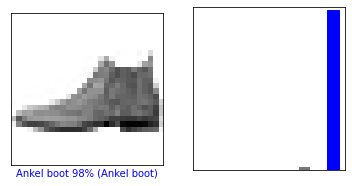

In [0]:
# 테스트로 0번쨰 원소으 ㅣ이미지, 예측, 신뢰도 점수 배열을 확인
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

<function matplotlib.pyplot.show>

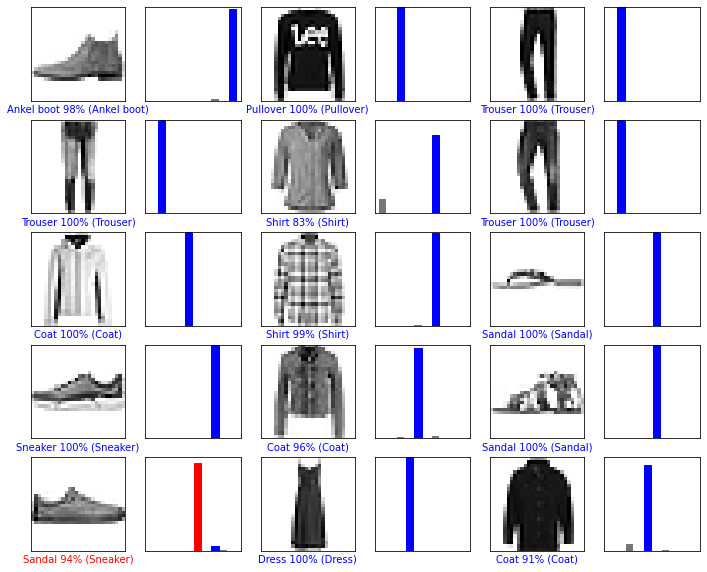

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize= (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i +1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i +2)
  plot_value_array(i, predictions, test_labels)
plt.show


In [0]:
# 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.
# 테스트 세트에서 이미지 하나를 선택해 신규 이미지라고 가정하고 예측을 한번 해본다.
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# tf.keras 모델은
# 한 번에 샘플의 묶음 또는 배치(batch) 로 예측을 만드는데 최척화 되어있다.
# 나하의 이미지를 사용할때도 2차원 배열로 만들어야 한다.
# 이미지 하나만 사용할 때도 배치에 추가합니다.
img = (np.expand_dims(img,0))

In [0]:
print(img.shape)

(1, 28, 28)


In [0]:
# 이제 이 이밎의 예측을 만든다.
predictions_single = model.predict(img)

print(predictions_single)

[[2.00462971e-08 4.34230873e-09 1.54245665e-08 1.40240974e-08
  1.14724344e-07 3.63705418e-04 1.96411952e-06 1.72102377e-02
  1.66180119e-08 9.82423902e-01]]


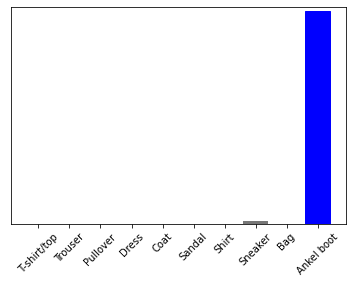

In [0]:
plot_value_array(0,predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation = 45)  #아까 x 라벨은 틱 없앴지만 이름을 뿌려주고 45도로 회전시키겟다.
# _= 그러진 플롯위에 플롯을 덧그릴때 사용.